# Aula 01

![](../../data/imagem/banner-pos-2022.jpg)

-----------

**Acessando e Manipulando Pixels em Imagens BGR no OpenCV**

No OpenCV, imagens coloridas são carregadas no formato BGR (Blue, Green, Red), ou seja, o canal azul vem primeiro, seguido pelo verde e pelo vermelho. Isso significa que ao acessar um pixel de uma imagem colorida, os valores retornados estarão nessa ordem.

# Importando Bibliotecas

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
PATH_DIR = '../../data'

sorted(os.listdir(PATH_DIR))

['imagem', 'video']

# Carregando uma Imagem

Para carregar uma imagem, utilizamos a função `cv2.imread()`, que pode receber o caminho do arquivo ou simplesmente o nome da imagem, caso esteja no diretório de trabalho:

In [6]:
img_path = os.path.join(PATH_DIR, 'imagem', 'imagem_frutas.jpg')
img = cv2.imread(img_path)

## Propriedades da Imagem

Uma vez carregada, podemos acessar algumas propriedades importantes da imagem:

### Dimensões (shape)

Retorna o número de linhas, colunas e canais (se for colorida).

In [7]:
dimensions = img.shape

print("A imagem tem {} de altura, {} de largura e {} canais.".format(*dimensions))

A imagem tem 385 de altura, 319 de largura e 3 canais.


### Tamanho total (size)

Indica o número total de elementos (altura × largura × canais).

In [8]:
total_pixels = img.size

print(f"A imagem tem um total de {total_pixels} pixels.")

A imagem tem um total de 368445 pixels.


### Tipo de dado (dtype)

Informa o tipo dos valores armazenados nos pixels. No caso das imagens, normalmente é uint8 (valores entre 0 e 255).

In [9]:
image_dtype = img.dtype
print(image_dtype)

uint8


## Exibindo uma Imagem

Para exibir a imagem carregada, utilizamos `cv2.imshow()`, que cria uma janela para visualização:

In [10]:
cv2.imshow("Imagem", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/octavio/anaconda3/envs/curso_visao_computacional/lib/python3.9/site-packages/cv2/qt/plugins"


# Salvando Imagens

Para salvar uma imagem em um arquivo, utilizamos a função `cv2.imwrite()`, que recebe o caminho/nome do arquivo de destino e a imagem a ser salva. Essa função é essencial para armazenar resultados de processamento ou imagens modificadas.


In [9]:
# Salvar a imagem com nome "frutas_copia.jpg"
sucesso = cv2.imwrite('frutas_copia.jpg', img)

# Verifica se a imagem foi salva com sucesso
if sucesso:
    print("Imagem salva com sucesso.")
else:
    print("Erro ao salvar a imagem.")

Imagem salva com sucesso.


# Carregando e Salvando Vídeos

## Carregando vídeos

In [64]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    cv2.imshow('WebCam', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
video_path = os.path.join(PATH_DIR, 'video', 'video_01.mp4')
cap = cv2.VideoCapture(video_path)

# Recupera os frames por segundo (FPS) do vídeo original.
fps = cap.get(cv2.CAP_PROP_FPS)
if fps <= 0:
    fps = 30

# Converte FPS para milissegundos de delay entre frames:
# Esse delay será usado no waitKey() para manter a velocidade original do vídeo
delay = int(1000 / fps)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    
    cv2.imshow('WebCam', frame)

    # waitKey(delay) pausa a execução pelo tempo calculado, mantendo o FPS original:
    ## Retorna -1 se nenhuma tecla for pressionada
    ## Retorna o código ASCII se uma tecla for pressionada
    ## Comparação com ord('q') permite sair ao pressionar 'q'
    if cv2.waitKey(delay) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Salvando vídeos

Aqui podemos realizar manipulações nos frames do vídeis, como:
* Realizar detecção de pessoas
* Proteção na identidade de pessoas, realizando manipulações de modo a não ter acesos a face da pessoa
* Classicação de objetos com falhas em linha de produção
* Etc

In [12]:
webcam = cv2.VideoCapture(0)
codec = cv2.VideoWriter_fourcc(*'XVID')
saida = cv2.VideoWriter('web_cam.avi', codec, 20.0, (640, 480))

while True:
    ret, frame = webcam.read()
    saida.write(frame)
    cv2.imshow("Gravando ... Presione 'q' para sair", frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

webcam.release()
saida.release()
cv2.destroyAllWindows()


# Desenhando e Escrevendo em imagens

Em projetos de Visão Computacional, frequentemente precisamos:

* Destacar resultados (como objetos detectados)
* Anotar informações (coordenadas, classes, confiança)
* Criar visualizações intuitivas para análise ou demonstração

O OpenCV oferece funções intuitivas para adicionar elementos gráficos diretamente em matrizes de pixels, mantendo alta performance.


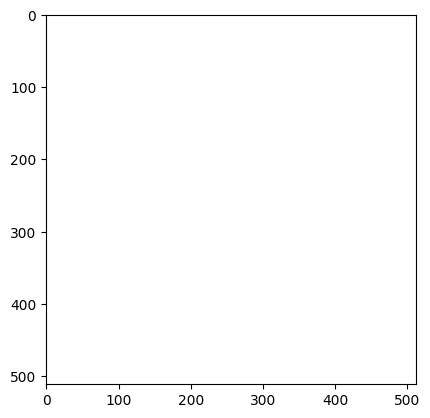

In [65]:
image = np.ones((512, 512, 3), np.uint8) * 255

plt.imshow(image)
plt.show()

## Desenhando Linha

```python
cv2.line(
    img,                  # Imagem de destino (numpy array)  
    (x1, y1),             # Ponto inicial (x, y)  
    (x2, y2),             # Ponto final (x, y)  
    (B, G, R),            # Cor (Blue, Green, Red)  
    espessura,            # Espessura da linha (px)  
    lineType=cv2.LINE_AA  # Tipo: LINE_AA (anti-aliasing) ou LINE_8 (padrão)  
)
```

In [66]:
img_draw = image.copy()

cv2.line(img_draw, (100, 100), (400, 400), (0, 0, 255), 5)
cv2.line(img_draw, (100, 500), (400, 400), (255, 0, 0), 5)

cv2.imshow("Linha", img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Desenhando Retângulo

```python
cv2.rectangle(
    img,           # Imagem de destino  
    (x1, y1),      # Canto superior esquerdo  
    (x2, y2),      # Canto inferior direito  
    (B, G, R),     # Cor  
    espessura,     # Espessura ou -1 (preenchimento)  
    lineType       # Opcional: Tipo de linha  
)
```

In [67]:
img_draw = image.copy()

cv2.rectangle(img_draw, (100, 100), (400, 400), (0, 0, 255), 5)
cv2.rectangle(img_draw, (100, 500), (400, 400), (255, 0, 0), 5)

cv2.imshow("Retangulo", img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Desenhando Círculo

```python 
cv2.circle(
    img,           # Imagem de destino  
    (x, y),        # Centro do círculo  
    raio,          # Raio em pixels  
    (B, G, R),     # Cor  
    espessura      # -1 para preenchimento  
)
```

In [68]:
img_draw = image.copy()

cv2.circle(img_draw, (100, 100), 50, (0, 0, 255), 5)
cv2.circle(img_draw, (400, 400), 50, (255, 0, 0), 5)

cv2.imshow("Circulo", img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Escrevendo texto

```python
cv2.putText(
    img,           # Imagem de destino  
    "Texto",       # String a ser escrita  
    (x, y),        # Canto inferior esquerdo do texto  
    fonte,         # Estilo (ex: cv2.FONT_HERSHEY_SIMPLEX)  
    escala,        # Tamanho do texto  
    (B, G, R),     # Cor  
    espessura,     # Espessura da fonte  
    lineType       # Opcional: Tipo de linha (ex: cv2.LINE_AA)  
)
```

**Fontes disponíveis:**

* cv2.FONT_HERSHEY_SIMPLEX (normal)
* cv2.FONT_HERSHEY_PLAIN (fino)
* cv2.FONT_HERSHEY_SCRIPT_COMPLEX (cursivo)

In [69]:
img_draw = image.copy()

cv2.putText(img_draw, "OpenCV", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
cv2.putText(img_draw, "Python", (200, 400), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)

cv2.imshow("Texto", img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Exeplo Prático

Suponha que você obteve as coordenadas do seu modelo de detecção de face. 

Como podmeos visualizar na imagem a detecção feita pelo modelo? 

In [11]:
img_path = os.path.join(PATH_DIR, 'imagem', 'lenna_250.png')
image = cv2.imread(img_path)

# Copia da imagem
img_draw = image.copy()

# Coordenadas do retângulo
x1, x2 = 70, 200
y1, y2 = 80, 190

# Desenha o retângulo
cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Texto
texto = "Lenna"
cv2.putText(img_draw, texto, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Exibe a imagem
cv2.imshow("Imagem", img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Acessando e Modificando Pixels

Podemos acessar um pixel específico informando suas coordenadas (linha, coluna). Como as imagens são armazenadas no formato BGR, um pixel retorna três valores:

In [12]:
# Aessando o pixel na posição (x=40, y=6)
(b, g, r) = img[6, 40]
print(b, g, r)

248 240 227


In [13]:
b = img[6, 40, 0]
print(b)

248


Da mesma forma, podemos modificar um pixel atribuindo novos valores:

In [14]:
img[6, 40] = (0, 0, 255)

In [15]:
(b, g, r) = img[6, 40]
print(b, g, r)

0 0 255


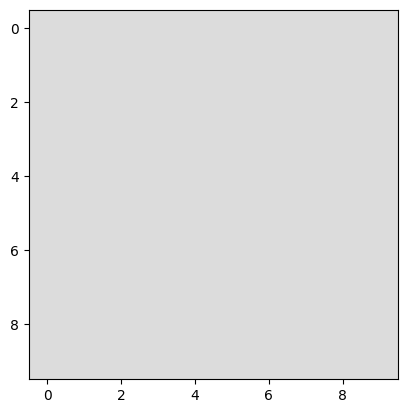

In [16]:
image = np.ones((10, 10, 3), dtype="uint8") * 220

plt.imshow(image)
plt.show()

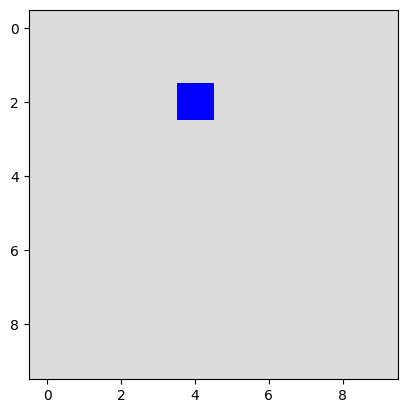

In [17]:
image[2, 4, :] = (0, 0, 255)

plt.imshow(image)
plt.show()

## Selecionando Regiões da Imagem
Também podemos acessar e manipular regiões inteiras da imagem. Por exemplo, para selecionar um quadrado de 150×150 pixels no canto superior esquerdo:

In [18]:
img_recort = img[0:150, 0:150]

In [19]:
cv2.imshow('Imagem original', img)
cv2.imshow('Imagem recortada', img_recort)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Acessando e Manipulando Pixels em Imagens tons de cinzas no OpenCV

Imagens em tons de cinza têm apenas um canal. Portanto, algumas diferenças são introduzidas ao trabalhar com essas imagens. Vamos destacar essas diferenças aqui.

Novamente, usaremos a função `cv2.imread()` para ler uma imagem. Neste caso, o segundo argumento é necessário porque queremos carregar a imagem em tons de cinza. O segundo argumento é um sinalizador que especifica a maneira como a imagem deve ser lida. O valor necessário para carregar uma imagem em tons de cinza é `cv2.IMREAD_GRAYSCALE`:

In [20]:
img_path = os.path.join(PATH_DIR, 'imagem', 'imagem_frutas.jpg')

img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [21]:
dimensions = img_gray.shape
print(dimensions)

(385, 319)


# Representação de Cores

# Ordem BGR no OpenCV

Já mencionamos que o OpenCV usa o formato de cor BGR em vez do RGB.

Os desenvolvedores iniciais do OpenCV escolheram o formato de cor BGR (em vez do RGB) porque, na época, o formato de cor BGR era muito popular entre os provedores de software e fabricantes de câmeras. Por exemplo, no Windows, ao especificar um valor de cor usando COLORREF, eles usaram o formato BGR, 0x00bbggrr (https://docs.microsoft.com/es/windows/desktop/gdi/colorref). Em resumo, o BGR foi escolhido por razões históricas.

Além disso, outros pacotes Python usam o formato de cor RGB. Portanto, precisamos saber como converter uma imagem de um formato para o outro. Por exemplo, o Matplotlib usa o formato de cor RGB.

O Matplotlib (https://matplotlib.org/) é a biblioteca de plotagem 2D Python mais popular e oferece uma ampla variedade de métodos de plotagem. Você pode interagir com as imagens plotadas (por exemplo, ampliar as imagens e salvá-las). O Matplotlib pode ser usado em scripts Python ou no Jupyter Notebook. Você pode verificar a documentação do Matplotlib para mais detalhes (https://matplotlib.org/contents.html).

Portanto, uma boa escolha para seus projetos é mostrar as imagens usando o pacote Matplotlib em vez da funcionalidade oferecida pelo OpenCV. Agora veremos como podemos lidar com os diferentes formatos de cor nas duas bibliotecas.

In [22]:
img_path = os.path.join(PATH_DIR, 'imagem', 'color_spaces.png')
img_bgr = cv2.imread(img_path)

In [23]:
cv2.imshow('Imagem original', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
b, g, r = cv2.split(img_bgr)

cv2.imshow('Canal B', b)
cv2.imshow('Canal G', g)
cv2.imshow('Canal R', r)
cv2.imshow('Imagem original', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

## BGR para RGB

In [26]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [27]:
cv2.imshow('Imagem BGR', img_bgr)
cv2.imshow('Imagem RGB', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

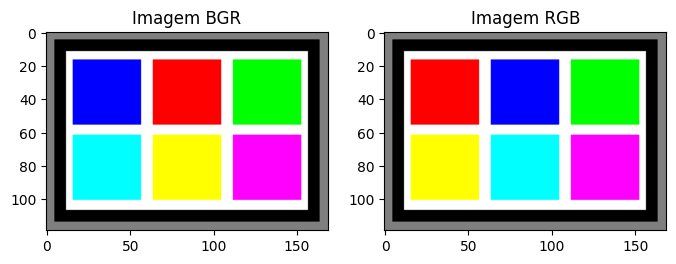

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
ax[0].imshow(img_bgr)
ax[0].set_title('Imagem BGR')
ax[1].imshow(img_rgb)
ax[1].set_title('Imagem RGB')
plt.show()

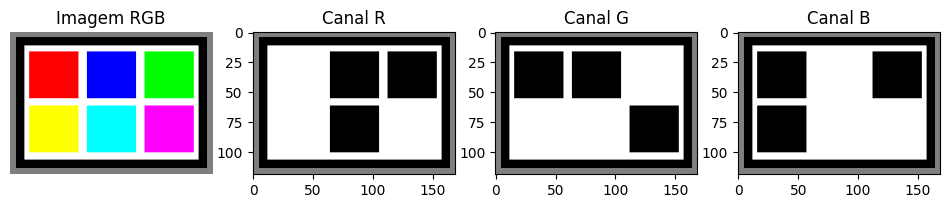

In [30]:
r, g, b = cv2.split(img_rgb)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,5))

ax[0].imshow(img_rgb)
ax[0].set_title('Imagem RGB')
ax[0].axis('off')

ax[1].imshow(r, cmap='gray')
ax[1].set_title('Canal R')
ax[0].axis('off')

ax[2].imshow(g, cmap='gray')
ax[2].set_title('Canal G')
ax[0].axis('off')

ax[3].imshow(b, cmap='gray')
ax[3].set_title('Canal B')
ax[0].axis('off')

plt.show()

## Cores no Espaço HSV

* Amplamente utilizado em Visão Computacional e Processamento de Imagens.
* Principais vantagens:
    * Separa a cor e iluminação.
    * Facilita a segmentação de objetos coloridos.
* Diferença em relação ao RGB:
    * RGB usa canais de cores primárias
    * HSV utiliza três componentes:
        * H (Hue/Matiz): Representa a cor em círculo de 0° a 360° na teoria das cores. No OpenCV, esse intervalo é escalado para 0 a 180 (metade da escala para otimização computacional).
        * S (Saturation / Saturação): Mede a intensidade da cor, variando de 0 (tons acinzentados) a 255 (cor mais intensa).
        * V (Value/Valor): Indica o brilho da cor, onde 0 é preto e 255 é o mais claro possível.
* Muito aplicado em algoritmos de segmentação de cores.

In [39]:
img_path = os.path.join(PATH_DIR, 'imagem', 'imagem_frutas.jpg')
img_bgr = cv2.imread(img_path)

# Converte a imagem BGR para RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Converte a imagem BGR para HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Exibe as imagens BGR e HSV
cv2.imshow('Imagem BGR', img_bgr)
cv2.imshow('Imagem HSV', img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
h, s, v = cv2.split(img_hsv)

# Exibe os canais H, S e V
cv2.imshow('Canal H', h)
cv2.imshow('Canal S', s)
cv2.imshow('Canal V', v)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
def ajustar_hsv(img, matiz=0, saturacao=0, valor=0):
    """
    Ajusta os componentes HSV de uma imagem em uma porcentagem.
    - matiz (-100% a +100%): controla a tonalidade das cores.
    - saturacao (-100% a +100%): controla a intensidade das cores.
    - valor (-100% a +100%): controla o brilho da imagem.
    """

    # Converter de RGB para HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)

    # Ajustar Matiz (H) - intervalo de 0 a 180 no OpenCV
    fator_h = (matiz / 100) * 180
    img_hsv[:, :, 0] = (img_hsv[:, :, 0] + fator_h) % 180

    # Ajustar Saturação (S) - intervalo de 0 a 255
    fator_s = (saturacao / 100) * 255
    img_hsv[:, :, 1] = np.clip(img_hsv[:, :, 1] + fator_s, 0, 255)

    # Ajustar Valor (V) - intervalo de 0 a 255 (brilho)
    fator_v = (valor / 100) * 255
    img_hsv[:, :, 2] = np.clip(img_hsv[:, :, 2] + fator_v, 0, 255)

    # Converter de volta para uint8 e para RGB
    img_hsv = img_hsv.astype(np.uint8)
    img_modificada = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

    return img_modificada

### Matiz

Este é o componente que nos permite diferenciar visualmente o azul do vermelho e do verde. Representa a tonalidade da cor, o que nos permite descrever uma cor "pura" como semelhante ou diferente de outra, sem adição de preto ou branco. Pode ser vista fisicamente como o comprimento de onda dominante da cor.

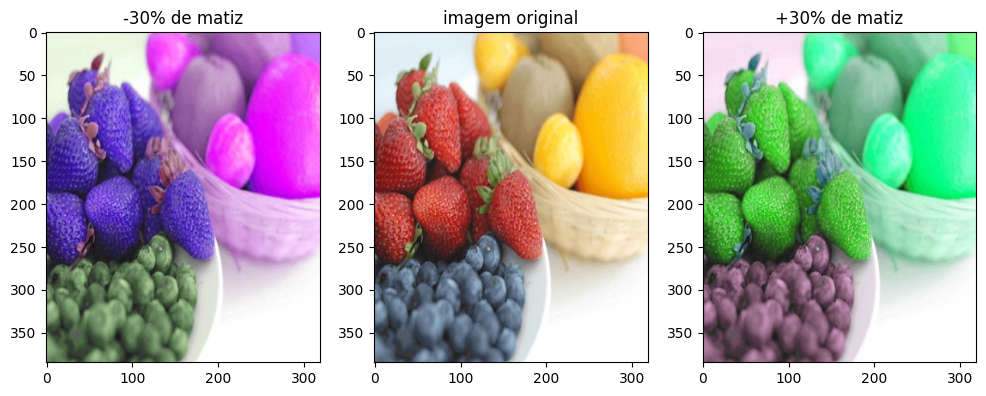

In [40]:
ptg_matiz = 30

img_modificada_1 = ajustar_hsv(img_rgb,  matiz=-ptg_matiz)
img_modificada_2 = ajustar_hsv(img_rgb,  matiz=ptg_matiz)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

ax[0].imshow(img_modificada_1)
ax[0].set_title(f'-{ptg_matiz}% de matiz')
ax[1].imshow(img_rgb)
ax[1].set_title('imagem original')
ax[2].imshow(img_modificada_2)
ax[2].set_title(f'+{ptg_matiz}% de matiz')

plt.show()

### Saturação

É a pureza ou intensidade da cor. Quanto maior o valor da saturação, mais pura será a cor; quanto menor, mais próxima ao seu tom de cinza ela será representada. Ao reduzir completamente a saturação de uma imagem, ela se transformará em uma imagem em tons de cinza.

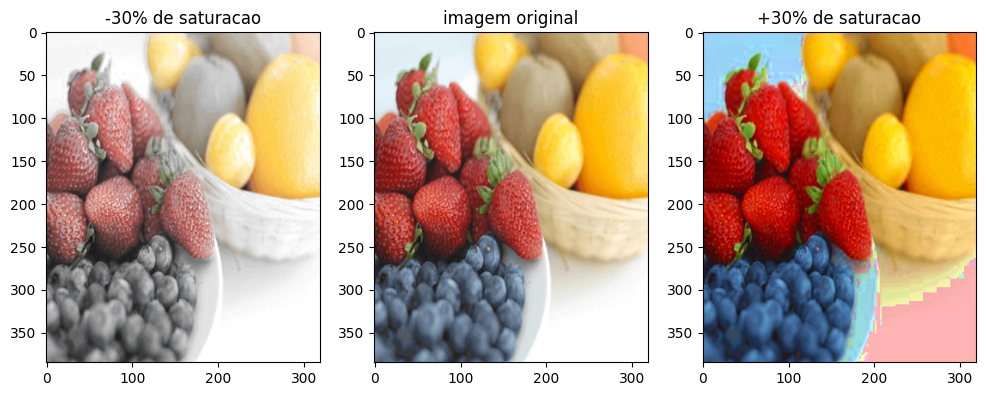

In [41]:
ptg_saturacao = 30

img_modificada_1 = ajustar_hsv(img_rgb, saturacao=-ptg_saturacao)
img_modificada_2 = ajustar_hsv(img_rgb, saturacao=ptg_saturacao)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

ax[0].imshow(img_modificada_1)
ax[0].set_title(f'-{ptg_saturacao}% de saturacao')
ax[1].imshow(img_rgb)
ax[1].set_title('imagem original')
ax[2].imshow(img_modificada_2)
ax[2].set_title(f'+{ptg_saturacao}% de saturacao')

plt.show()

### Valor

Este valor é referente ao brilho da cor, à luminosidade ou escala de claridade. Quanto maior a luminosidade, ou o valor deste componente, mais próximo ao branco a cor será representada; quanto menor, mais próxima ao preto. Ao aumentar completamente a luminosidade de uma imagem, ela se transformará em uma imagem completamente branca, mas, ao realizarmos a operação inversa, ela se transformará em uma imagem completamente preta.

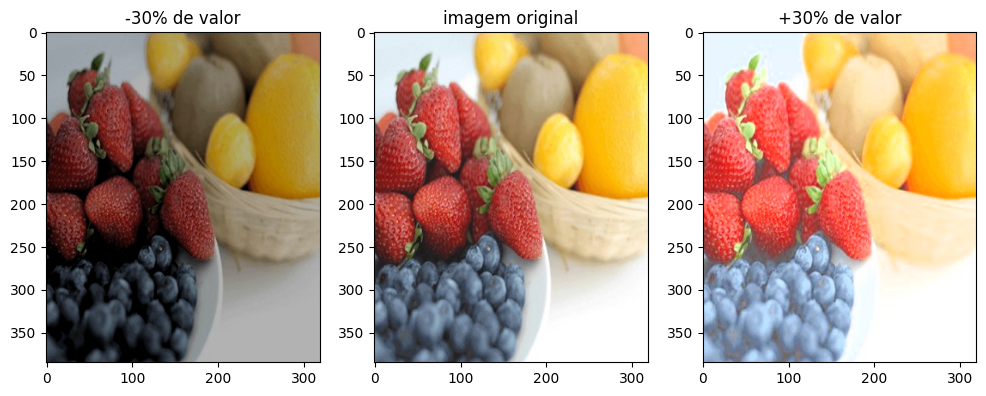

In [42]:
ptg_valor = 30

img_modificada_1 = ajustar_hsv(img_rgb, valor=-ptg_valor)
img_modificada_2 = ajustar_hsv(img_rgb, valor=ptg_valor)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

ax[0].imshow(img_modificada_1)
ax[0].set_title(f'-{ptg_valor}% de valor')
ax[1].imshow(img_rgb)
ax[1].set_title('imagem original')
ax[2].imshow(img_modificada_2)
ax[2].set_title(f'+{ptg_valor}% de valor')

plt.show()

# Histograma

O histograma de cores de uma imagem é a distribuição de frequência dos níveis de cinza em relação ao número de amostras. Essa distribuição nos fornece informações sobre a qualidade da imagem, principalmente no que diz respeito à intensidade luminosa e ao contraste.

## Histograma de imagem binária

Por possuir pixels representados apenas pela cor preta ou branca, o **histograma de cores de uma imagem binária** pode ser facilmente obtido. O total de pixels pretos ou bancos pode ser obtido percorrendo toda a matriz que representa a imagem, contando-os individualmente.


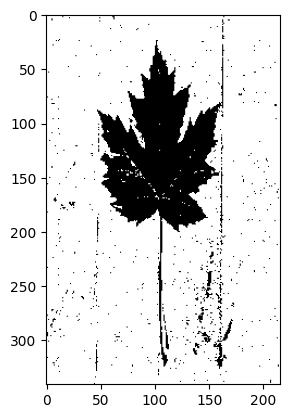

In [43]:
img_path = os.path.join(PATH_DIR, 'imagem', 'imagem_folha_binaria.bmp')
img_bin = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img_bin, cmap='gray')
plt.show()

In [44]:
shape = img_bin.shape

total_preto = 0
total_branco = 0

for i in range(shape[0]):
    for j in range(shape[1]):
        if img_bin[i][j] == 0:
            total_preto += 1
        else:
            total_branco += 1

print('Total de pixels preto:', total_preto)
print('Total de pixels branco:', total_branco)

Total de pixels preto: 12098
Total de pixels branco: 61558


In [45]:
np.unique(img_bin, return_counts=True)

(array([  0, 255], dtype=uint8), array([12098, 61558]))

In [46]:
values, counts = np.unique(img_bin, return_counts=True)
for value, count in zip(values, counts):
    print(f'O valor {value} aparece {count} vezes')

O valor 0 aparece 12098 vezes
O valor 255 aparece 61558 vezes


Mesmo sendo um algoritmo simples e de fácil entendimento, esse procedimento não é muito utilizado para obter o total de pixels de cada cor. Isso porque a biblioteca Matplotlib possui a função hist, que, além de abstrair essa tarefa, gera a figura que ilustra o histograma de cores da imagem.

O método ravel, aplicado no primeiro parâmetro, tem a finalidade de transformar a imagem em um vetor, isto é, organizar todos os elementos em uma estrutura, contendo uma única linha e N colunas. Em que N representa o total de pixels da imagem.


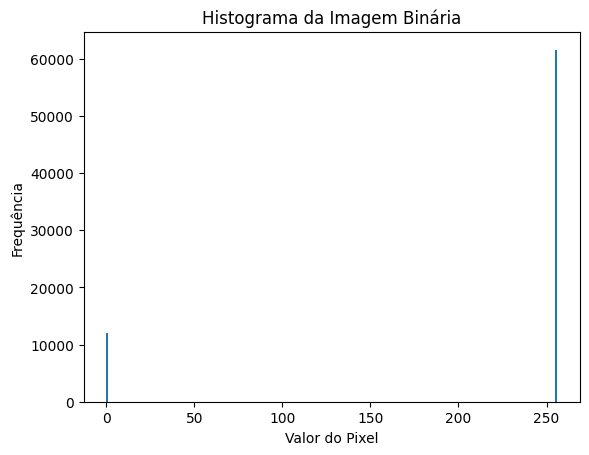

In [47]:
plt.hist(img_bin.ravel(), bins=256, range=(0,256))
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.title('Histograma da Imagem Binária')
plt.show()

## Histograma de imagem em tons de cinza

Nas imagens em tons de cinza, por haver grande diversidade de tons, o histograma pode ser representado em classes que contabilizam os valores em determinados intervalos. Quanto maior o número de classes, mais informações sobre a imagem podem ser representadas.

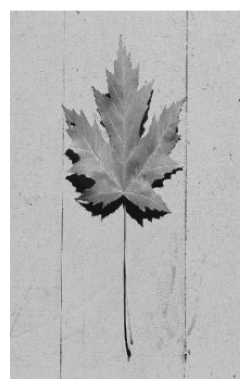

In [48]:
img_path = os.path.join(PATH_DIR, 'imagem', 'imagem_folha_cinza.jpg')
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

O histograma ilustrado na figura revela que a imagem processada é uma com baixo nível de contraste. Imagens com baixo nível contraste são caracterizadas por apresentarem histogramas estreitos, ou seja, muitos elementos concentrados em intervalos pequenos.

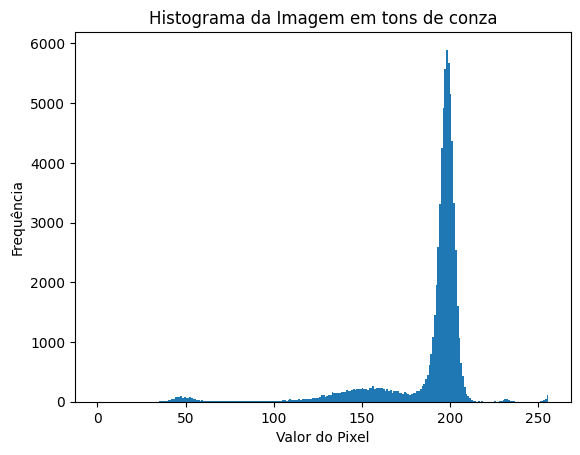

In [49]:
plt.hist(img_gray.ravel(), bins=256, range=(0,256))
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.title('Histograma da Imagem em tons de conza')
plt.show()

## Histograma em imagem colorida

Uma imagem colorida possui um histograma para cada canal de cor. Uma vez que cada canal é representado por pixels em tons de cinza, o mesmo método estudado nos tópicos anteriores pode ser utilizado para plotar esses histogramas.

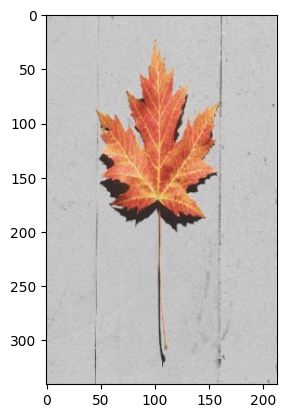

In [50]:
img_path = os.path.join(PATH_DIR, 'imagem', 'imagem_folha.jpg')
img = cv2.imread(img_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [51]:
img_r, img_g, img_b = cv2.split(img)

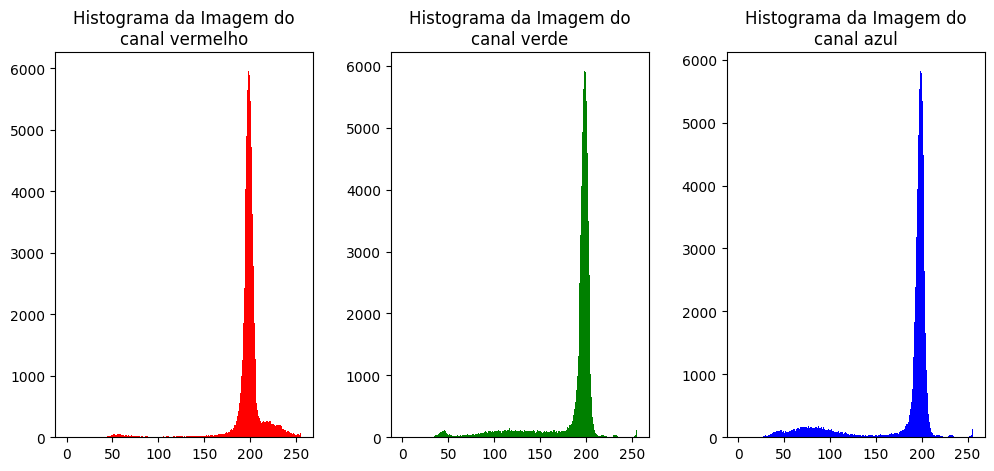

In [52]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.hist(img_r.ravel(), bins=256, range=(0,256), color='red')
plt.title('Histograma da Imagem do\ncanal vermelho')

plt.subplot(1,3,2)
plt.hist(img_g.ravel(), bins=256, range=(0,256), color='green')
plt.title('Histograma da Imagem do\ncanal verde')

plt.subplot(1,3,3)
plt.hist(img_b.ravel(), bins=256, range=(0,256), color='blue')
plt.title('Histograma da Imagem do\ncanal azul')

plt.subplots_adjust(wspace=0.3, hspace=0.1)

plt.show()

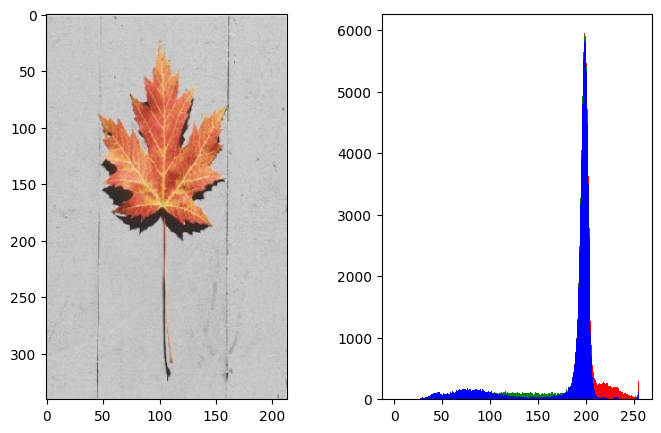

In [53]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.hist(img_r.ravel(), bins=256, range=(0,256), color='red')
plt.hist(img_g.ravel(), bins=256, range=(0,256), color='green')
plt.hist(img_b.ravel(), bins=256, range=(0,256), color='blue')

plt.subplots_adjust(wspace=0.3, hspace=0.1)

plt.show()

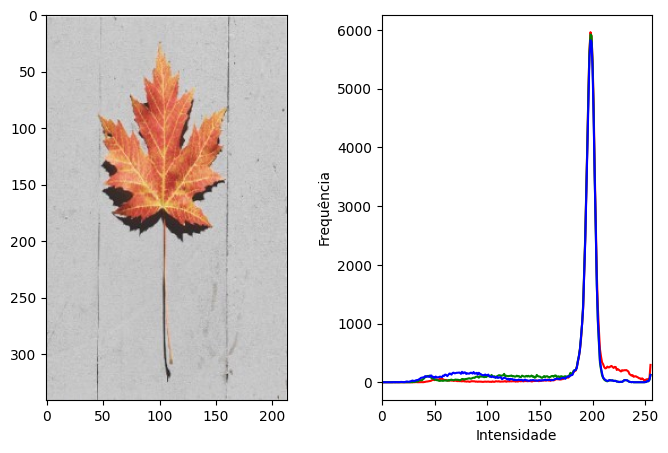

In [54]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)

# Calcula os histogramas sem plotar barras
hist_r = cv2.calcHist([img_r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img_g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([img_b], [0], None, [256], [0, 256])

# Plota as linhas ao invés das barras
plt.plot(hist_r, color='red')
plt.plot(hist_g, color='green')
plt.plot(hist_b, color='blue')

plt.xlim([0, 256])  # Define os limites do eixo X
plt.xlabel("Intensidade")
plt.ylabel("Frequência")

plt.subplots_adjust(wspace=0.3, hspace=0.1)

plt.show()


## Equalização de Histograma

* O histograma de uma imagem fornece informações sobre sua exposição à luz e seu nível de contraste.
* Imagens superexpostas apresentam histogramas deslocados para a direita.
* Imagens subexpostas apresentam histogramas deslocados para a esquerda.
* O contraste da imagem pode ser identificado por meio da distribuição dos valores no histograma:
    * Baixo contraste: histograma estreito, concentrado em um intervalo pequeno.
    * Alto contraste: histograma amplo, distribuído por toda a faixa de tons.

#### Importância da equalização de histograma
* Melhorar a nitidez de objetos de interesse em imagens com baixo contraste.
* Redistribuir os níveis de intensidade para ocupar toda a faixa disponível (0 a 255 em tons de cinza).
* Aplicável a imagens capturadas em condições adversas, como ambientes enfumaçados ou com iluminação inadequada

A função `cv2.equalizeHist` da biblioteca **OpenCV** nos permite equalizar histogramas de imagens. Ela possui como único parâmetro obrigatório a matriz que representa a imagem carregada. Executando essa função, uma nova imagem com o histograma equalizado será retornada.


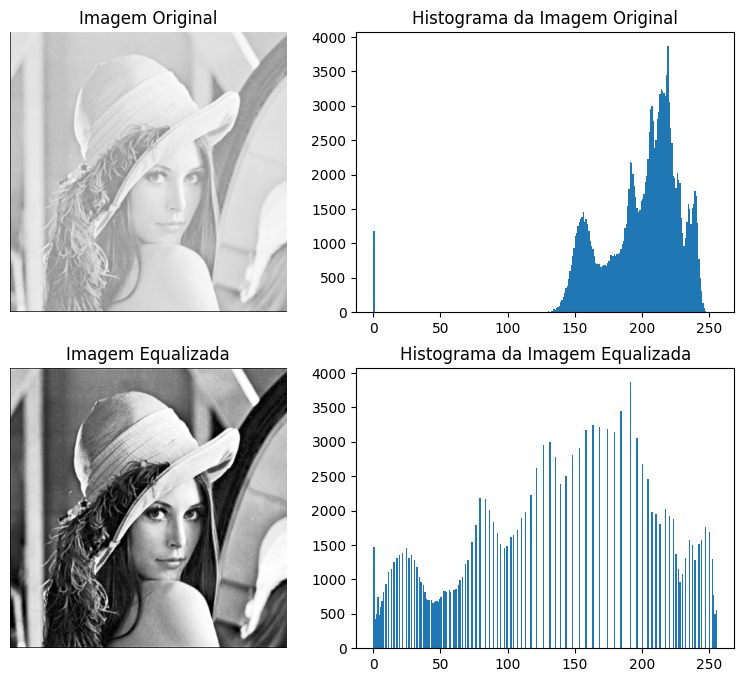

In [55]:
img_path = os.path.join(PATH_DIR, 'imagem', 'lena_cinza.png')

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img_equalizada = cv2.equalizeHist(img)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.hist(img.ravel(), bins=256, range=(0,256))
plt.title('Histograma da Imagem Original')

plt.subplot(2,2,3)
plt.imshow(img_equalizada, cmap='gray')
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(img_equalizada.ravel(), bins=256, range=(0,256))
plt.title('Histograma da Imagem Equalizada')

plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.show()

## Equalização em imagens coloridas

* A equalização individual dos canais R, G e B pode distorcer as cores da imagem.

* A solução é converter a imagem para o espaço de cores HSV:

    * Converter a imagem de RGB para HSV.

    * Aplicar a equalização ao canal V (intensidade luminosa).

    * Converter a imagem de volta para RGB.

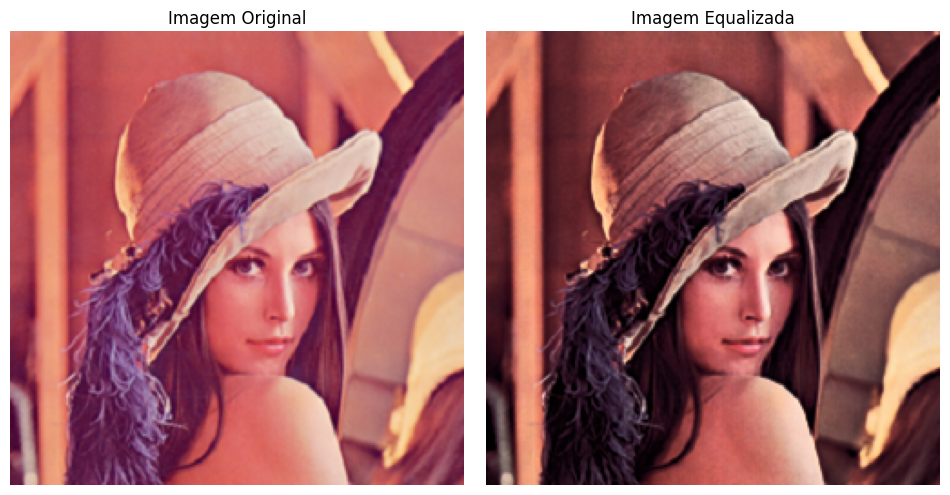

In [56]:
img_path = os.path.join(PATH_DIR, 'imagem', 'lenna_250.png')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Converter para HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Equalizar apenas o canal de intensidade V
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2])

# Converter de volta para RGB
img_equalizada = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_equalizada)
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.3)
plt.show()